**Data Types**  

Boolean : PickUp_Time, Gender  
Categorical: PickUp_Colombo_ID,   
Numerical:N_Passengers, N_Passengers, Duration_Min, Tip, Total_Amount 

--------------------------------------------------------------------------
Integer: Cab_Driver_ID, Duration_Min, Tip, Total_Amount PickUp_Colombo_ID,N_Passengers  
String: Gender, PickUp_Time  
Date: Date

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import xlrd
import statistics
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
data = pd.read_excel('cmb_cabs.xlsx')
#df = pd.read_csv('exported.xlsx') # for csv files

In [ ]:
# displaying the top 5 rows of the dataframe
data.head()

,Cab_Driver_ID,Gender,PickUp_Colombo_ID,N_Passengers,Date,PickUp_Time,Duration_Min,Tip,Total_Amount
0,5.0,M,2.0,1.0,2021-10-20,Day,25.0,4.56,26.31
1,20.0,F,11.0,4.0,2021-09-03,Night,25.0,0.57,22.32
2,16.0,F,11.0,1.0,2021-09-22,Day,48.0,3.89,45.65
3,7.0,M,15.0,3.0,2021-07-19,Day,30.0,9.64,35.74
4,15.0,F,5.0,1.0,2021-11-20,Day,37.0,5.12,37.31


In [ ]:
# No of Rows,No of columns
data.shape

(1000, 9)

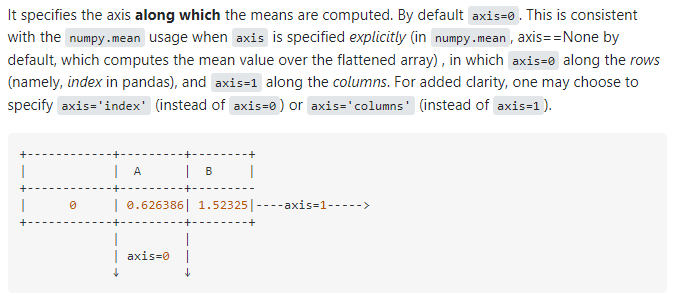

In [ ]:
# Here we take the values where is a null along the rows
rows_with_NaN = data[data.isnull().any(axis=1)]
rows_with_NaN

,Cab_Driver_ID,Gender,PickUp_Colombo_ID,N_Passengers,Date,PickUp_Time,Duration_Min,Tip,Total_Amount
999,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,31.477906


In [ ]:
# dropping the null values from the dataframe
data=data.dropna()

In [ ]:
# rechecking the shape of the dataframe after dropping the null values
data.shape

(999, 9)

In [ ]:
# Taking the data types of columns in the dataframe
data.dtypes

Cab_Driver_ID               float64
Gender                       object
PickUp_Colombo_ID           float64
N_Passengers                float64
Date                 datetime64[ns]
PickUp_Time                  object
Duration_Min                float64
Tip                         float64
Total_Amount                float64
dtype: object

In [ ]:
# Taking the summary statistic of the numerical columns of the dataframe
data[['N_Passengers','Duration_Min','Tip','Total_Amount']].describe()

,N_Passengers,Duration_Min,Tip,Total_Amount
count,999.000000,999.000000,999.000000,999.000000
mean,2.482482,30.477477,4.985956,31.501361
std,1.129600,14.594768,2.969104,12.969897
min,1.000000,7.000000,0.000000,6.390000
25%,1.000000,17.000000,2.375000,20.305000
50%,2.000000,30.000000,5.040000,31.560000
75%,3.000000,43.000000,7.510000,42.170000
max,4.000000,55.000000,9.990000,57.350000


In [ ]:
# Taking the uniques values under Gender
data.Gender.unique()

array(['M', 'F'], dtype=object)

In [ ]:
# Taking the uniques values under Piuckup time
data.PickUp_Time.unique()

array(['Day', 'Night'], dtype=object)

In [ ]:
# Taking the uniques values under Piuckup time
data.Cab_Driver_ID.unique()

array([ 5., 20., 16.,  7., 15.,  9.,  3., 11.,  4.,  1., 19., 12.,  2.,
        6., 18., 13.,  8., 14., 10., 17.])

In [ ]:
# Taking the uniques values under PickUp_Colombo_ID
data.PickUp_Colombo_ID.unique()

array([ 2., 11., 15.,  5.,  7., 14.,  8.,  1.,  4., 10., 12., 13.,  3.,
        9.,  6.])

In [ ]:
# Taking the mode 
print(data['PickUp_Colombo_ID'].mode())
print(data['Gender'].mode())

0    14.0
dtype: float64
0    M
dtype: object


In [ ]:
# converting the floating in to the integer values 
data['PickUp_Colombo_ID'] =  data["PickUp_Colombo_ID"].astype(int)
data['N_Passengers'] =  data["N_Passengers"].astype(int)
data['Cab_Driver_ID'] =  data["Cab_Driver_ID"].astype(int)

03. a)  
How much money do drivers make each night on average?  
What is the distribution for Male and Female?  
Draw the findings using necessary charts.


In [ ]:
# Filtering out the data - Night time
condition_night = data['PickUp_Time']=='Night'
night_data = data[condition_night] 
print('night time avg. tot amount by a driver :',night_data['Total_Amount'].mean())

night time avg. tot amount by a driver : 31.65277955271566


In [ ]:
condition_male = data['Gender']=='M'
condition_female = data['Gender']=='F'
night_male_data = data[condition_night & condition_male]
night_female_data = data[condition_night & condition_female]
print('Night time avg.total amount of male   :',night_male_data['Total_Amount'].mean())
print('Night time avg.total amount of female :',night_female_data['Total_Amount'].mean())

Night time avg.total amount of male   : 31.52415000000001
Night time avg.total amount of female : 31.88044247787611


In [ ]:

pie_chart = px.pie(data_frame = night_data,values = 'Total_Amount',names = 'Gender',color= 'Gender',title='Total Amount in Night vs grouped by Gender')
pie_chart

In [ ]:
fig = px.bar(night_data, x="Date", y="Total_Amount", color="Gender", title="Bar Chart")
fig.show()

3. b)  
Did cab drivers from ABC make more money in weekends compared to weekdays? 
> Yes, as a average they make more money on weekends

In [ ]:
# taking a copy of the original dataset
data2 = data.copy()
data2.head(1)

,Cab_Driver_ID,Gender,PickUp_Colombo_ID,N_Passengers,Date,PickUp_Time,Duration_Min,Tip,Total_Amount
0,5,M,2,1,2021-10-20,Day,25.0,4.56,26.31


In [ ]:
data2["Date"] = pd.to_datetime(data2["Date"])
# taking the week of the day
data2["DayOfWeek"] = data2["Date"].dt.weekday
data2.head(2)

,Cab_Driver_ID,Gender,PickUp_Colombo_ID,N_Passengers,Date,PickUp_Time,Duration_Min,Tip,Total_Amount,DayOfWeek
0,5,M,2,1,2021-10-20,Day,25.0,4.56,26.31,2
1,20,F,11,4,2021-09-03,Night,25.0,0.57,22.32,4


In [ ]:
data2["IsWeekend"] = data2["DayOfWeek"] >= 5
data2.head(2)

,Cab_Driver_ID,Gender,PickUp_Colombo_ID,N_Passengers,Date,PickUp_Time,Duration_Min,Tip,Total_Amount,DayOfWeek,IsWeekend
0,5,M,2,1,2021-10-20,Day,25.0,4.56,26.31,2,False
1,20,F,11,4,2021-09-03,Night,25.0,0.57,22.32,4,False


In [ ]:
# Filtering out the data - weekend and weekday
condition_weekend = data2['IsWeekend']==True
condition_weekday = data2['IsWeekend']==False
weekend_data = data2[condition_weekend] 
weekday_data = data2[condition_weekday] 
print('Total income in weekend :',weekend_data['Total_Amount'].sum())
print('Total income in weekday :',weekday_data['Total_Amount'].sum())

Total income in weekend : 9873.28
Total income in weekday : 21596.58


In [ ]:
weekend_days_count = len(weekend_data.index)
weekday_days_count = len(weekday_data.index)
print('Avg income in weekend :',weekend_data['Total_Amount'].sum()/weekend_days_count)
print('Avg income in weekday :',weekday_data['Total_Amount'].sum()/weekday_days_count)

Avg income in weekend : 32.371409836065574
Avg income in weekday : 31.11899135446686


3. c)  
Where are the best Colombo states in Colombo for drivers to be, in order to pick up profitable fares?  
How does this vary at different times of the day for Male and Female drivers?

In [ ]:
data.head(1)

,Cab_Driver_ID,Gender,PickUp_Colombo_ID,N_Passengers,Date,PickUp_Time,Duration_Min,Tip,Total_Amount
0,5,M,2,1,2021-10-20,Day,25.0,4.56,26.31


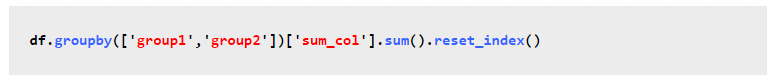

In [ ]:
data_cmbID1 = data.groupby(['PickUp_Colombo_ID'])['Total_Amount','Tip','Duration_Min'].sum().reset_index()
data_cmbID1.sort_values(by = ['Total_Amount','Tip','Duration_Min'], ascending = [False,False,True])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,PickUp_Colombo_ID,Total_Amount,Tip,Duration_Min
13,14,2509.52,369.32,2460.0
9,10,2483.67,385.23,2412.0
4,5,2342.47,363.22,2275.0
3,4,2325.91,361.45,2258.0
6,7,2164.58,339.32,2098.0
2,3,2145.33,345.30,2069.0
0,1,2109.70,345.34,2028.0
1,2,2081.59,367.69,1970.0
12,13,2034.63,305.94,1987.0
7,8,2021.39,344.03,1928.0


In [ ]:
data_cmbID2 = data.groupby(['PickUp_Colombo_ID','Gender','PickUp_Time'])['Total_Amount','Tip','Duration_Min'].sum().reset_index()
data_cmbID2.sort_values(by = ['Total_Amount','Tip','Duration_Min'], ascending = [False,False,True])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,PickUp_Colombo_ID,Gender,PickUp_Time,Total_Amount,Tip,Duration_Min
38,10,M,Day,1257.16,215.77,1197.0
10,3,M,Day,1099.09,167.32,1071.0
54,14,M,Day,1091.15,178.52,1049.0
18,5,M,Day,1075.47,172.41,1038.0
6,2,M,Day,1059.48,174.69,1017.0
34,9,M,Day,957.32,161.27,915.0
30,8,M,Day,949.24,155.80,912.0
26,7,M,Day,881.88,132.81,861.0
22,6,M,Day,857.29,157.81,804.0
14,4,M,Day,841.24,126.97,821.0


3. d)  
How much are drivers tipped? How do tipping rates vary by Colombo state ID?  
Draw a colour matrix to represent the details in visually

In [ ]:
data_drivers1 = data.groupby(['Cab_Driver_ID'])['Tip'].sum().reset_index()
data_drivers1.sort_values(by = ['Tip'], ascending = [False])

,Cab_Driver_ID,Tip
16,17,302.49
17,18,292.92
10,11,287.68
0,1,275.24
7,8,272.26
13,14,268.37
8,9,266.38
3,4,262.21
9,10,257.68
4,5,253.84


In [ ]:
data_drivers2 = data.groupby(['PickUp_Colombo_ID'])['Tip'].sum().reset_index()
data_drivers2.sort_values(by = ['Tip'], ascending = [False])

,PickUp_Colombo_ID,Tip
9,10,385.23
13,14,369.32
1,2,367.69
4,5,363.22
3,4,361.45
0,1,345.34
2,3,345.30
7,8,344.03
6,7,339.32
5,6,328.17


In [ ]:
data_drivers3 = data.groupby(['PickUp_Colombo_ID','Cab_Driver_ID'])['Tip'].sum().reset_index()
corr = data_drivers3.corr()
corr.style.background_gradient(cmap='coolwarm')

,PickUp_Colombo_ID,Cab_Driver_ID,Tip
PickUp_Colombo_ID,1.000000,-0.005324,-0.102150
Cab_Driver_ID,-0.005324,1.000000,0.042303
Tip,-0.102150,0.042303,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



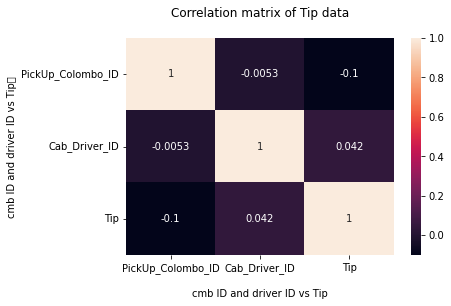

In [ ]:
hm = sns.heatmap(data_drivers3.corr(), annot = True)
hm.set(xlabel='\ncmb ID and driver ID vs Tip', ylabel='cmb ID and driver ID vs Tip\t', title = "Correlation matrix of Tip data\n")
plt.show()

3. e)  
In addition to the above 4 key questions, describe 2 more explorative data analysis questions that you can answer.  
Describe those 2 key questions and show all the explorative analysis.  
> 1.   Monthly Total_Amount without Tip of drivers 
> 2.   N_Passengers as per PickUp_Time 